In [1]:
%matplotlib notebook
%pylab
import pandas as pd
from time import perf_counter

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
# import shallow water module
from swe_cgdg_functions import * # for CG/DG

In [3]:
order = array([1,2,3])             # polynomial order
N_element = array([16,32,64,128])  
kstages = 3
#CFL = 0.1                         # CFL number
Tfinal = 0.5
method_type = 'dg'
integration_type = 1               # % = 1 is inexact and = 2 is exact
iplot = False                      # plot the solution
plot_movie = False
icase = 4                          # case number: 1 is a Gaussian and 2 is a sinusoidal
delta_nl = 0
h_eps = 1e-3 
filter_type = 1
weight_type = 1                    # 0 = quadratic, 1 = erfc-log
flux_type = 'roe'                  # rusa = rusanov, hll = Harten-Lax-van Leer (HLL), roe
xmu = 0.05                         # filtering strength: 1 = full strength and 0 = no filter
ifilter = 0                        # 1 = apply the filter, 0 = not apply the filter
limiter = 0                        # 1 = apply the limiter, 0 = not apply the limiter

ax = 0                             # left side of the problem domain       
bx = 1                             # right side of the problem domain   
diss = 1
u = 2    

problem_type = 'Standing wave'
print('Equation: Shallow water\n')
print('Equation type: '+problem_type +'\n')

# initialize the norm arrays
len_el = len(N_element)
len_pol = len(order)
l2eh_norm = zeros((len_pol, len_el))
l2eU_norm = zeros((len_pol, len_el))
max_norm = zeros((len_pol, len_el))


Nv = N_element
    
# Begining of the simulation
# loop over polynomial orders
for iN,N in enumerate(order):
    
    CFL = 1/(N+1)                 # CFL number
    
    # compute the number of node in each element
    if (integration_type == 1):
        Q = N
    elif (integration_type == 2):
        Q = N+1

    wall = 0
    
    # loop over elements
    for e, nel in enumerate(Nv):
        
        Np = nel*N + 1
    
        # Call shallow water solver
        '''
        outputs:
        --------
        q_h, q_hu   : height and momentum, computed values
        qe_h, qe_hu : height and momentum, exact values
        coord       : All grid points
        intma       : Intma(CG/DG)
        '''
        tic = perf_counter()
        
        qe_h,qe_hu, q_h,q_hu, x_sol, coord, intma = cg_dgSolver(N,Q,nel, Np, ax, bx, integration_type,\
                    u, CFL, Tfinal, kstages, icase,delta_nl,h_eps,plot_movie,xmu,ifilter,diss,\
                    method_type,limiter,filter_type,weight_type,flux_type)
        
        toc = perf_counter()
        wall += toc - tic
        
        # Compute L2- norm
        num1 = 0
        denom1 = 0
        num2 = 0
        denom2 = 0

        for i in range(Np):
            num1 += (q_h[i]-qe_h[i])**2
            denom1 += (qe_h[i])**2
            num2 += (q_hu[i]-qe_hu[i])**2
            denom2 += (qe_hu[i])**2

        e2h = sqrt(num1/denom1)
        e2U = sqrt(num2/denom2)
        
        #max_norm[iN, e] = max(error)
        
        l2eh_norm[iN,e] = e2h
        l2eU_norm[iN,e] = e2U
        #Np_array[iN,e] = Np
        
        print('\twalltime = {:e}'.format(wall))

Equation: Shallow water

Equation type: Standing wave

N = 1, nel = 16, Np = 17
	dt = 1.4706e-02
	Number of time steps = 34
	walltime = 7.750351e-02
N = 1, nel = 32, Np = 33
	dt = 7.5758e-03
	Number of time steps = 66
	walltime = 3.474611e-01
N = 1, nel = 64, Np = 65
	dt = 3.8462e-03
	Number of time steps = 130
	walltime = 1.339807e+00
N = 1, nel = 128, Np = 129
	dt = 1.9380e-03
	Number of time steps = 258
	walltime = 4.834032e+00
N = 2, nel = 16, Np = 33
	dt = 5.0505e-03
	Number of time steps = 99
	walltime = 2.731758e-01
N = 2, nel = 32, Np = 65
	dt = 2.5641e-03
	Number of time steps = 195
	walltime = 1.266095e+00
N = 2, nel = 64, Np = 129
	dt = 1.2920e-03
	Number of time steps = 387
	walltime = 4.972727e+00
N = 2, nel = 128, Np = 257
	dt = 6.4851e-04
	Number of time steps = 771
	walltime = 1.961849e+01
N = 3, nel = 16, Np = 49
	dt = 2.5510e-03
	Number of time steps = 196
	walltime = 7.116864e-01
N = 3, nel = 32, Np = 97
	dt = 1.2887e-03
	Number of time steps = 388
	walltime = 3.2252

<IPython.core.display.Javascript object>


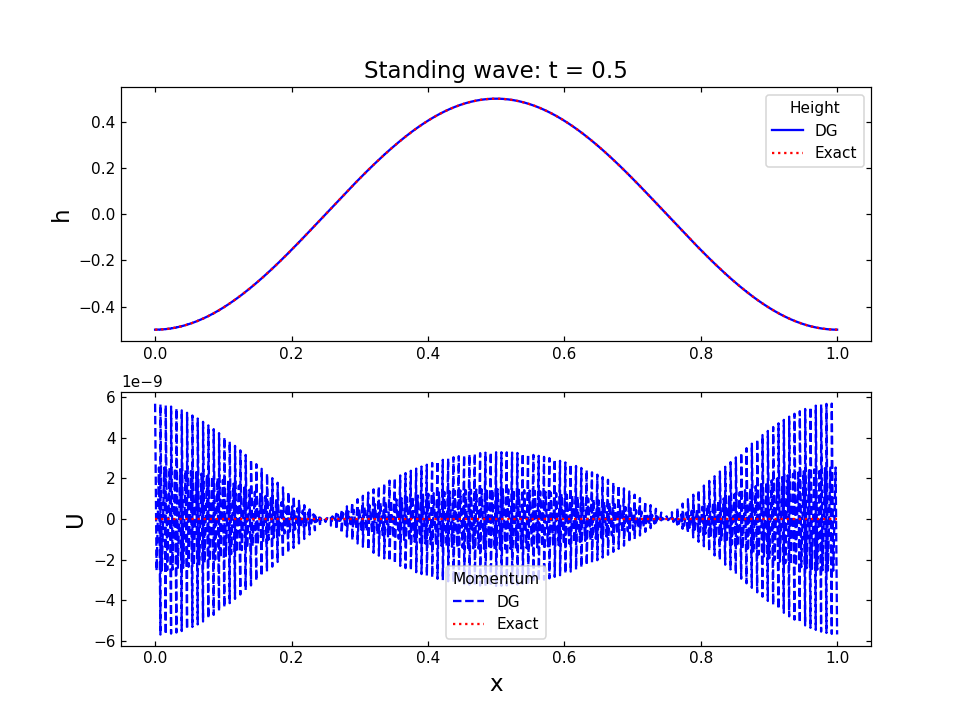

In [4]:
axi = arange(-5,6)
#figure(2)
figure(2,figsize=(8,6))

spx = subplot(211)
plot(x_sol,q_h, 'b-', label = '{}'.format(method_type.upper()))
plot(x_sol,qe_h, 'r:', label = 'Exact')
ylabel('h', fontsize = 15)
#ylim([0.5,1.5])

spx.tick_params(bottom = True, top = True, left = True, right = True)
spx.tick_params(labelbottom = True, labeltop = False, labelleft = True, labelright = False)
spx.tick_params(axis="x", direction="in")
spx.tick_params(axis="y", direction="in")
title(problem_type +': t = {}'.format(Tfinal), fontsize = 15)
spx.legend(title="Height")
spx = subplot(212)
plot(x_sol,q_hu, 'b--', label = '{}'.format(method_type.upper()))
plot(x_sol,qe_hu, 'r:', label = 'Exact')
xlabel('x', fontsize = 15)
ylabel('U', fontsize = 15)
#ylim([0.9,])

spx.tick_params(bottom = True, top = True, left = True, right=True)
spx.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
spx.tick_params(axis="x", direction="in")
spx.tick_params(axis="y", direction="in")
spx.legend(title="Momentum")
show()

<IPython.core.display.Javascript object>


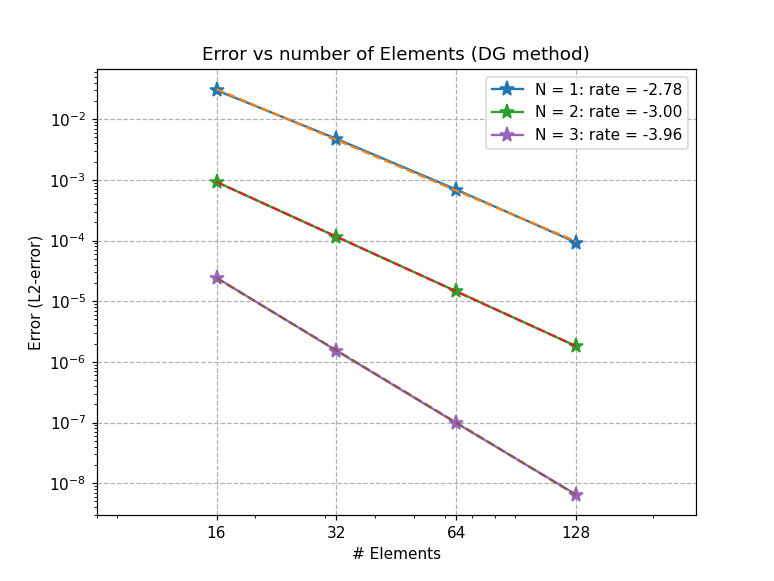

In [5]:
import cg_graphics
figure(4)
clf()

for i,N in enumerate(order):
    
    if(N > 4):
        p = polyfit(log(Nv[:2]), log(l2eh_norm[i][:2]), 1)
    else:
        
        p = polyfit(log(Nv), log(l2eh_norm[i]), 1)
        
    loglog(Nv, l2eh_norm[i], '-*',markersize=10, label = 'N = {:d}: rate = {:.2f}'.format(N,p[0]))
    
    loglog(Nv, exp(polyval(p,log(Nv))), '--')
    
cg_graphics.set_xticks(Nv)
xlabel('# Elements')
ylabel('Error (L2-error)')
title('Error vs number of Elements ({:s} method)'.format('dg'.upper()))
grid(axis='both',linestyle='--')
legend()
show()   